# Task: Climate data Analysis

Undertake a comprehensive climate data analysis project to explore and understand historical climate patterns and trends. The objective is to derive valuable insights from climate data, enabling a better understanding of weather conditions over time.

### Import the required libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [64]:
df = pd.read_csv('climate_change_data.csv')
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [67]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

In [68]:
df.set_index('Date', inplace=True)
df.head()

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Month
Date,,,,,,,,,
2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,January
2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,January
2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,January
2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,January
2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,January


In [69]:
df.shape

(10000, 9)

In [71]:
df.describe(include=object)

,Location,Country,Month
count,10000,10000,10000
unique,7764,243,12
top,North David,Congo,January
freq,12,94,849


In [72]:
df.isnull().sum()

Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
Month             0
dtype: int64

In [73]:
df.nunique()

Location           7764
Country             243
Temperature       10000
CO2 Emissions     10000
Sea Level Rise    10000
Precipitation     10000
Humidity          10000
Wind Speed        10000
Month                12
dtype: int64

### Data Visualization

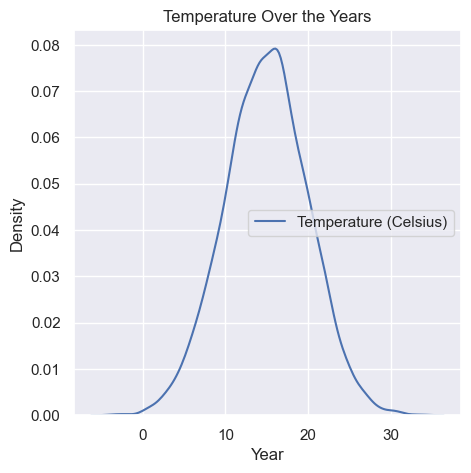

In [17]:
plt.figure(figsize=(5, 5))
sns.kdeplot(df['Temperature'], label='Temperature (Celsius)')
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Temperature Over the Years')
plt.legend()
plt.show()

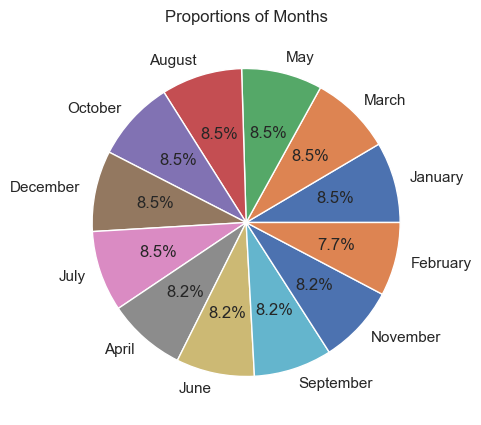

In [20]:
month_counts = df['Month'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(month_counts, labels = month_counts.index, autopct='%1.1f%%')
plt.title('Proportions of Months')
plt.show()


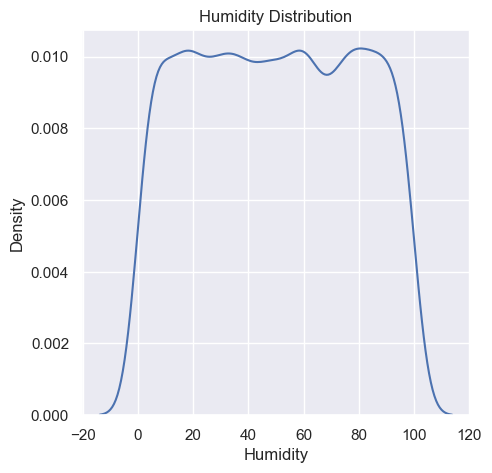

In [30]:
plt.figure(figsize=(5, 5))
sns.kdeplot(df['Humidity'], label='Humidity')
plt.xlabel('Humidity')
plt.title('Humidity Distribution')
plt.show()

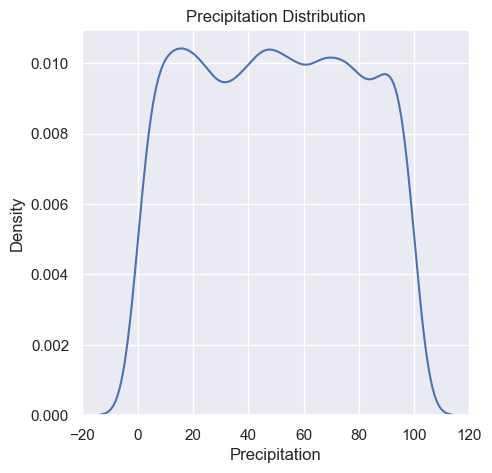

In [32]:
plt.figure(figsize=(5, 5))
sns.kdeplot(df['Precipitation'], label='Precipitation')
plt.xlabel('Precipitation')
plt.title('Precipitation Distribution')
plt.show()

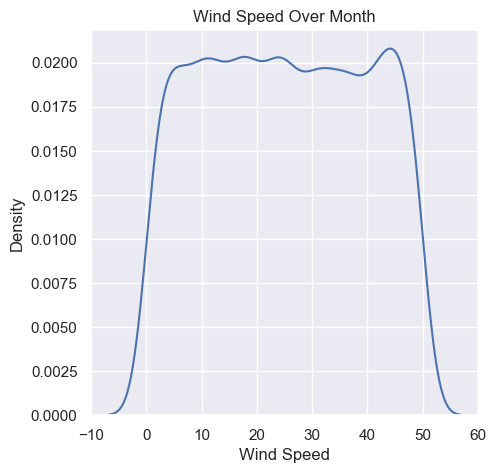

In [34]:
plt.figure(figsize=(5, 5))
sns.kdeplot(df['Wind Speed'])
plt.xlabel('Wind Speed')
plt.title('Wind Speed Over Month')
plt.show()

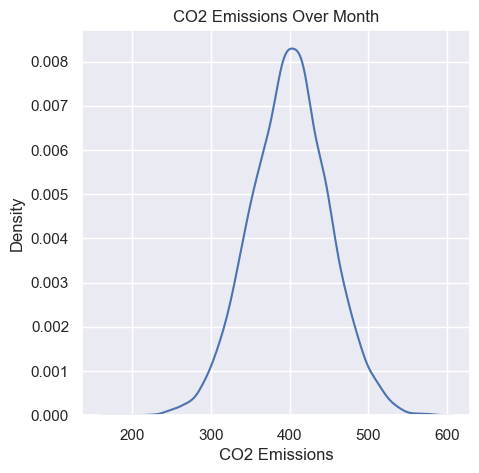

In [40]:
plt.figure(figsize=(5, 5))
sns.kdeplot(df['CO2 Emissions'])
plt.xlabel('CO2 Emissions')
plt.title('CO2 Emissions Over Month')
plt.show()

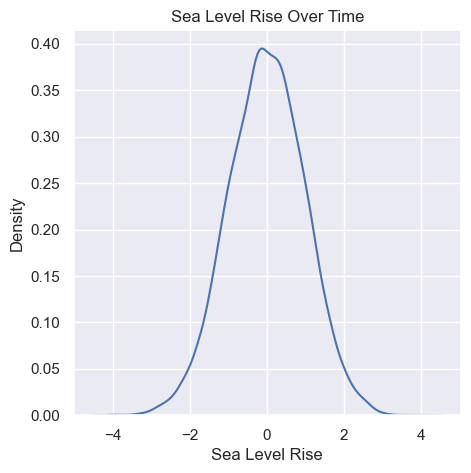

In [41]:
plt.figure(figsize=(5, 5))
sns.kdeplot(x=df['Sea Level Rise'])
plt.xlabel('Sea Level Rise')
plt.title('Sea Level Rise Over Time')
plt.show()

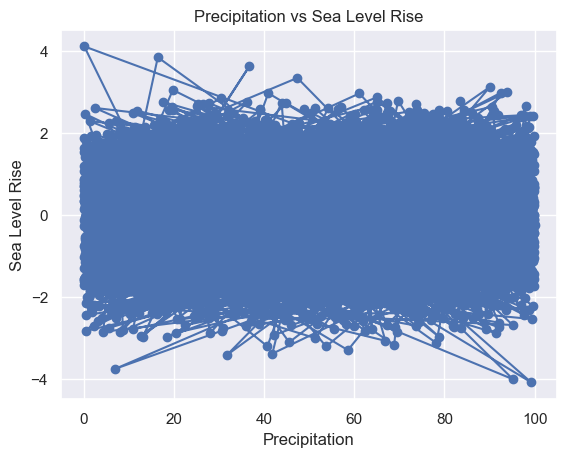

In [42]:
plt.plot(df['Precipitation'], df['Sea Level Rise'], marker='o')
plt.title('Precipitation vs Sea Level Rise')
plt.xlabel('Precipitation')
plt.ylabel('Sea Level Rise')
plt.show()

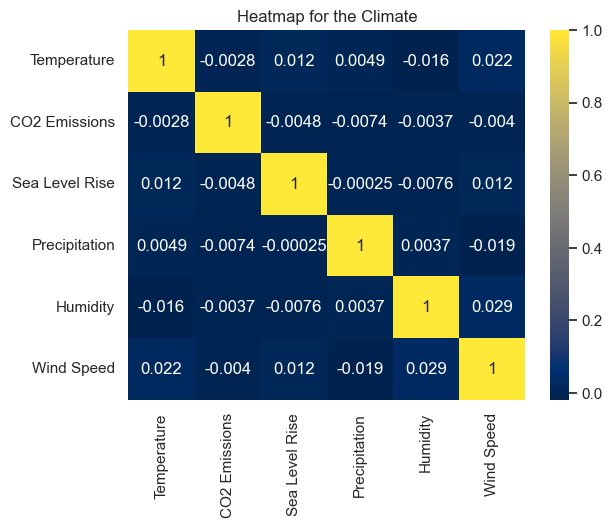

In [60]:
df_numeric = df.select_dtypes(include=[np.number])

sns.heatmap(df_numeric.corr(), annot=True, cmap='cividis')
plt.title('Heatmap for the Climate')
plt.show()


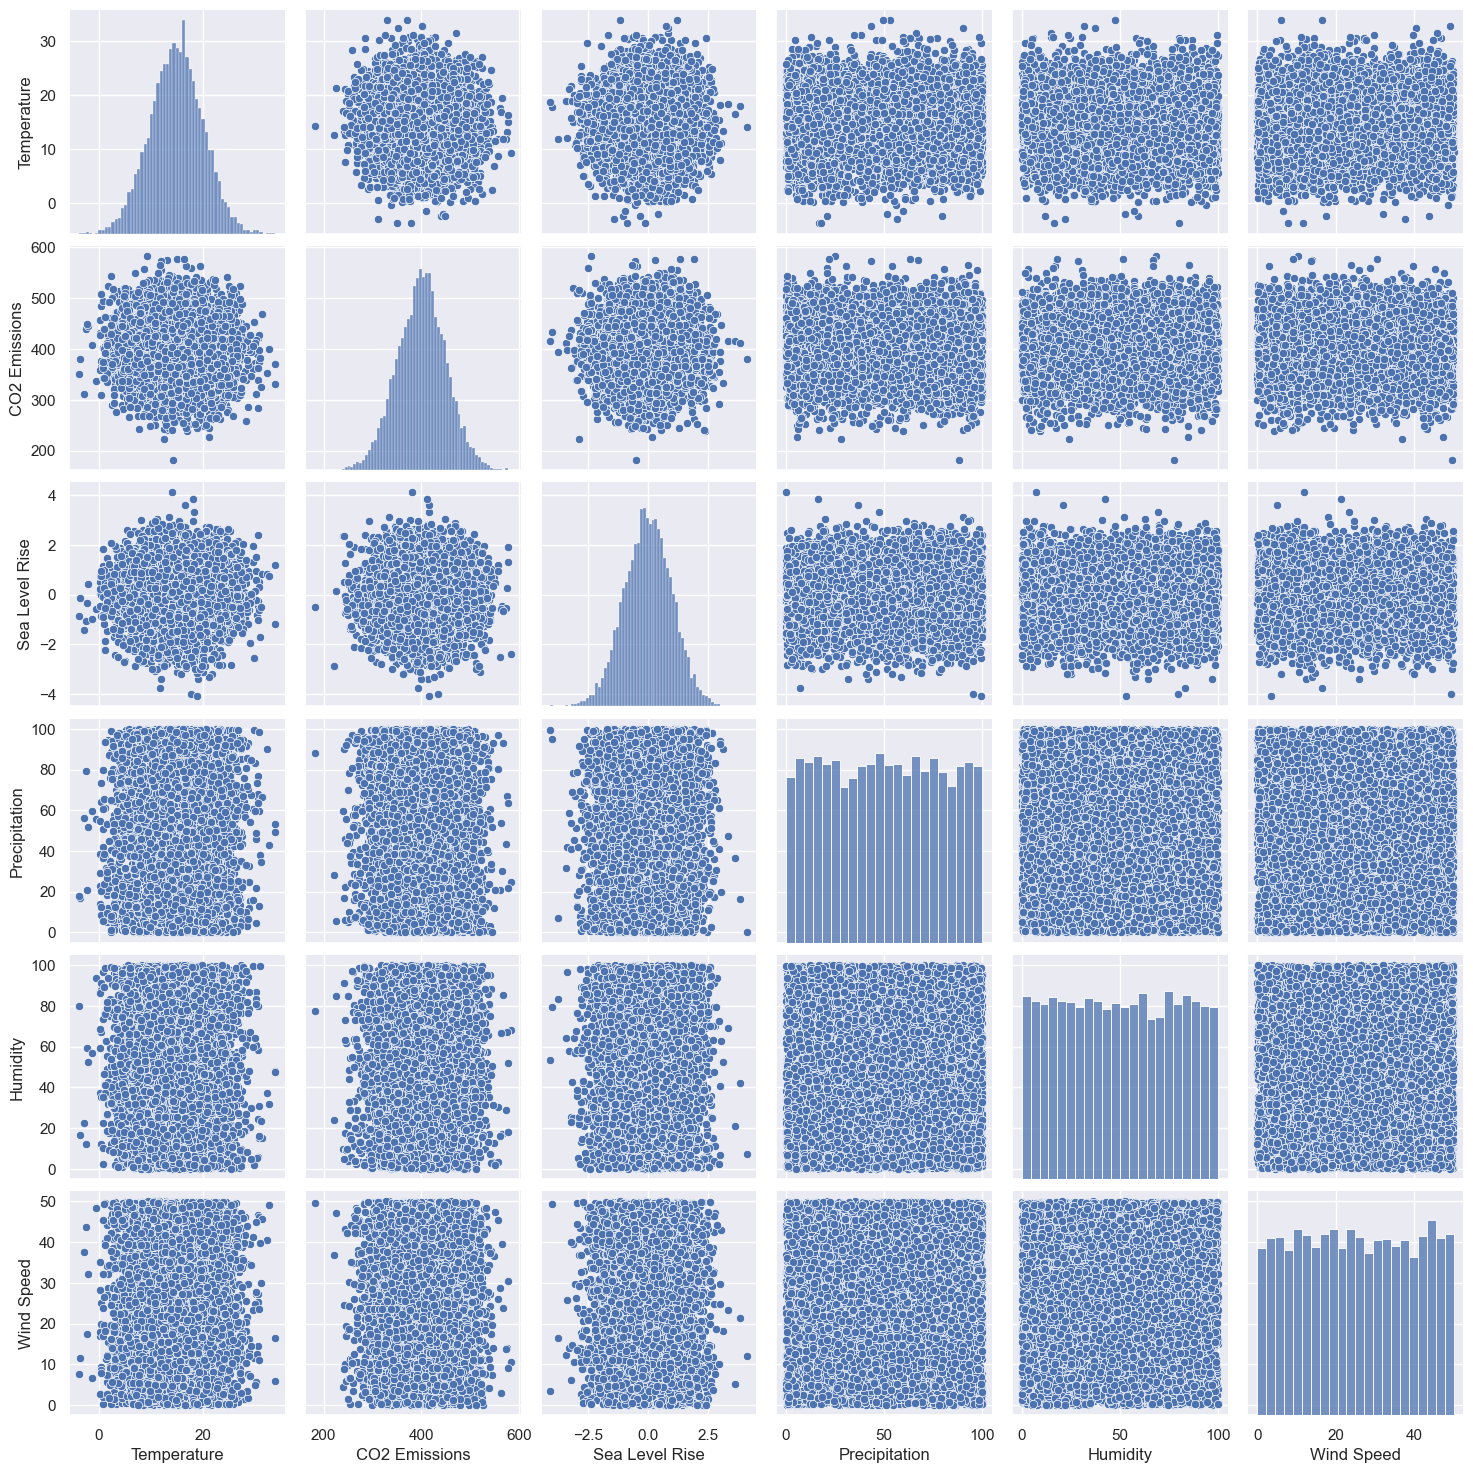

In [13]:
sns.pairplot(df)

### Data Preprocessing

In [47]:
X = df[['Precipitation', 'Humidity', 'Wind Speed']]
y = df[['Temperature']]

In [48]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Training the Model
- After training the model, the model can be able to predict the temperature according to the given climatic features (i.e., CO2 emissions, sea level rise, precipitation, wind speed, humidity, etc.)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
model.fit(x_train, y_train)

LinearRegression()

In [51]:
len(x_train), len(y_train)

(8000, 8000)

In [52]:
len(x_test), len(y_test)

(2000, 2000)

In [53]:
print('Accuracy of the model: ', model.score(x_test, y_test))

Accuracy of the model:  -4.865912085305624e-05


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(x_test)

In [55]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4.094621103575584


In [56]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 26.923879455735293


In [57]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 5.188822550033417


In [58]:
actual_predict= pd.DataFrame({
    'Actual values': y_test.values.flatten(),
    'Predicted values': y_pred.flatten()})
actual_predict.head()

,Actual values,Predicted values
0,16.399303,15.100166
1,15.154172,15.018857
2,16.996833,14.887703
3,14.150096,14.907882
4,10.730885,14.953608
